In [1]:
import pandas as pd
import matplotlib.pyplot as mp

Matplotlib is building the font cache; this may take a moment.


In [3]:
file = 'MII dec 2022.xlsx'
xl = pd.ExcelFile(file)
# print(xl.sheet_names)
df1 = xl.parse(xl.sheet_names[0])
df1.drop(df1.tail(1).index,inplace=True) # drop last n rows
# print(df1)

In [4]:
# df1[['GC1','GC2']] = df1['Group code'].str.split(expand=True).add_prefix('visit_')
temp = df1.astype({'Group code':'string'})['Group code'].str.split(pat ="\\s*",expand=True).add_prefix('GC')
df1['GC0'] = pd.Series(temp['GC0'])
df1['GC1'] = pd.Series(temp['GC1'])
df1['GC2'] = pd.Series(temp['GC2'])
# df1.describe

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'Group code' not found in columns."

In [4]:
df1['GC1'].unique()

<StringArray>
['3', '1', '4', '6', '2', '9', '7', '5', '8', '0', <NA>]
Length: 11, dtype: string

In [5]:
df1['GC2'].unique()

<StringArray>
['3', '8', '4', '5', '0', '1', '.', '6', '2', '7', <NA>, '9']
Length: 12, dtype: string

In [6]:
df1['Group code text'].unique()
#df1['Group code text'].unique().size

array(['Planned SME OH', 'BWE Electrical', 'Conveyor Vulcanising',
       'Conveyor CMM', 'Planned Operation', 'BWE Operation',
       'Planned VULCANSING', 'Conveyor Operation', 'Spreader Operation',
       'MTC MM', 'Conveyor Electrical', 'BWE MM', 'Unplanned Vulcanising',
       'Common Miscellaneous', 'Common Other', 'Conveyor CMRR',
       'Unplanned MM', 'Tripper Operation', 'Unplanned MRR',
       'Common Electrical', 'Planned Track shifting',
       'Unplanned OPERATION', 'MTC Operation', 'Common Operation',
       'MTC Electrical', 'Tripper CMM', 'Tripper Vulcanising',
       'BWE VULCANSING', 'BWE MRR', nan, 'Unplanned ELECTRICAL',
       'Spreader MM', 'Spreader Vulcanising', 'Unplanned SME', 'MTC MRR',
       'Spreader Electrical', 'Stacker Operation', 'Stacker MM',
       'Reclaimer Operation', 'Reclaimer MM', 'Reclaimer Vulcanising'],
      dtype=object)

In [7]:
df1 = df1.dropna(axis=0, subset=['Duration'])

def calculateMin(x):
    arr = x.split('.')
    if arr[0] != '' and arr[1] != '':
        return int(arr[0])*60 + int(arr[1])
    else:
        return 0

def combineCode(x,y):
    return str(x).split('.')[0].rjust(2,'0') + str(y).split('.')[0].rjust(2,'0')

def combstop(y):
    arr = y.split('.')
    if arr[1]!= '' and arr[1] != '':
        return int(arr[0])*3600 + int(arr[1])*60
    else:
        return 0
df1['CombStop'] = df1.apply(lambda row: combstop(row['Stoppage']), axis=1)
df1['DurInMin'] = df1.apply(lambda row: calculateMin(row['Duration']), axis=1)
df1['CombCode'] = df1.apply(lambda row: combineCode(row['Group code'], row['Cause code']), axis=1)
df1


,Plant,Date,Shift,Material Number,Bench,BWE,TWH,EWH,Stoppage,BOUND HOURS,...,Cause code,Remarks,Group code text,Cause code text,GC0,GC1,GC2,CombStop,DurInMin,CombCode
0,M002,2022-12-01,I,SF01OBURDEN,NSB,1420,00.00,00.00,08.00,0.0,...,1.0,Over haul,Planned SME OH,Over haul,,3,3,28800,480,3301
1,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,17.0,BW boom hoisting & lowering & L/U Track moveme...,BWE Electrical,Hoisting/lowering trouble-ele.,,1,8,25200,120,1817
2,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,5.0,NS7 Center core cutting,Conveyor Vulcanising,Center core cutting,,4,4,25200,15,4405
3,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,1.0,NS7 Frame no : 38 Roller removal,Conveyor CMM,Line roller changing/removal,,4,5,25200,15,4501
4,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,2.0,Daily maintenance,Planned Operation,Daily maintenance,,3,0,25200,240,3002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,M002,2022-12-31,II,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,99.0,stand by,Common Miscellaneous,Others,,7,.,18000,210,0799
4178,M002,2022-12-31,III,FG01LIGNITE,LHS,1231,00.00,00.00,08.00,0.0,...,99.0,Stand by,Common Miscellaneous,Others,,7,.,28800,480,0799
4179,M002,2022-12-31,III,FG01LIGNITE,LHS,REC1,00.00,00.00,08.00,0.0,...,99.0,stand by,Common Miscellaneous,Others,,7,.,28800,480,0799
4180,M002,2022-12-31,III,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,99.0,stand by,Common Miscellaneous,Others,,7,.,18000,75,0799


In [9]:
dfsum = ['CombStop']
df1['sumofsec'] = df1[dfsum].sum(axis=1)
df1

,Plant,Date,Shift,Material Number,Bench,BWE,TWH,EWH,Stoppage,BOUND HOURS,...,Remarks,Group code text,Cause code text,GC0,GC1,GC2,CombStop,DurInMin,CombCode,sumofsec
0,M002,2022-12-01,I,SF01OBURDEN,NSB,1420,00.00,00.00,08.00,0.0,...,Over haul,Planned SME OH,Over haul,,3,3,28800,480,3301,28800
1,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,BW boom hoisting & lowering & L/U Track moveme...,BWE Electrical,Hoisting/lowering trouble-ele.,,1,8,25200,120,1817,25200
2,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,NS7 Center core cutting,Conveyor Vulcanising,Center core cutting,,4,4,25200,15,4405,25200
3,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,NS7 Frame no : 38 Roller removal,Conveyor CMM,Line roller changing/removal,,4,5,25200,15,4501,25200
4,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,Daily maintenance,Planned Operation,Daily maintenance,,3,0,25200,240,3002,25200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,M002,2022-12-31,II,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,18000,210,0799,18000
4178,M002,2022-12-31,III,FG01LIGNITE,LHS,1231,00.00,00.00,08.00,0.0,...,Stand by,Common Miscellaneous,Others,,7,.,28800,480,0799,28800
4179,M002,2022-12-31,III,FG01LIGNITE,LHS,REC1,00.00,00.00,08.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,28800,480,0799,28800
4180,M002,2022-12-31,III,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,18000,75,0799,18000


In [10]:
df1['CombStop'] = pd.to_numeric(df1['CombStop'],errors = 'coerce')
df1.groupby('Cause code text')['CombStop'].sum()
df1

,Plant,Date,Shift,Material Number,Bench,BWE,TWH,EWH,Stoppage,BOUND HOURS,...,Remarks,Group code text,Cause code text,GC0,GC1,GC2,CombStop,DurInMin,CombCode,sumofsec
0,M002,2022-12-01,I,SF01OBURDEN,NSB,1420,00.00,00.00,08.00,0.0,...,Over haul,Planned SME OH,Over haul,,3,3,28800,480,3301,28800
1,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,BW boom hoisting & lowering & L/U Track moveme...,BWE Electrical,Hoisting/lowering trouble-ele.,,1,8,25200,120,1817,25200
2,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,NS7 Center core cutting,Conveyor Vulcanising,Center core cutting,,4,4,25200,15,4405,25200
3,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,NS7 Frame no : 38 Roller removal,Conveyor CMM,Line roller changing/removal,,4,5,25200,15,4501,25200
4,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,Daily maintenance,Planned Operation,Daily maintenance,,3,0,25200,240,3002,25200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,M002,2022-12-31,II,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,18000,210,0799,18000
4178,M002,2022-12-31,III,FG01LIGNITE,LHS,1231,00.00,00.00,08.00,0.0,...,Stand by,Common Miscellaneous,Others,,7,.,28800,480,0799,28800
4179,M002,2022-12-31,III,FG01LIGNITE,LHS,REC1,00.00,00.00,08.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,28800,480,0799,28800
4180,M002,2022-12-31,III,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,stand by,Common Miscellaneous,Others,,7,.,18000,75,0799,18000


In [11]:
df2 = df1.groupby(['CombStop'])['CombStop'].sum()
df2

CombStop
600          5400
900          9900
1200         6000
1500         3000
1800        70200
           ...   
25800      103200
26100      339300
27000      972000
27900      111600
28800    25948800
Name: CombStop, Length: 85, dtype: int64

In [12]:
df2 = df1.groupby(['CombCode'])['CombStop'].sum().reset_index(name ='CombStop')
df2

,CombCode,CombStop
0,0001,77400
1,0058,11700
2,0099,54300
3,0701,1440900
4,0702,289800
...,...,...
137,9202,86400
138,9404,2883600
139,9499,57600
140,9801,57600


In [13]:
df2 = df1.groupby(['CombCode','Group code text','Cause code text'])['CombStop'].sum().reset_index(name ='CombStop')
df2 = df2.sort_values('CombStop', ascending=[False]).head(10)
df2

,CombCode,Group code text,Cause code text,CombStop
87,4409,Conveyor Vulcanising,BTR Clamp fixing,7532100
66,3002,Planned Operation,Daily maintenance,6208200
8,0721,Common Miscellaneous,Machine on Stand-By,4976700
15,0799,Common Miscellaneous,Others,4605300
24,1012,BWE Operation,BWE Repostioning/movement,4154100
19,0901,Common Other,OB Rear load,3938700
21,1001,BWE Operation,BWE Track Area Preparation,3018300
138,9404,Unplanned Vulcanising,Conveyor unplanned vulcanising,2883600
97,4501,Conveyor CMM,Line roller changing/removal,2783700
67,3301,Planned SME OH,Over haul,2707200


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='Group code text', ylabel='CombStop'>

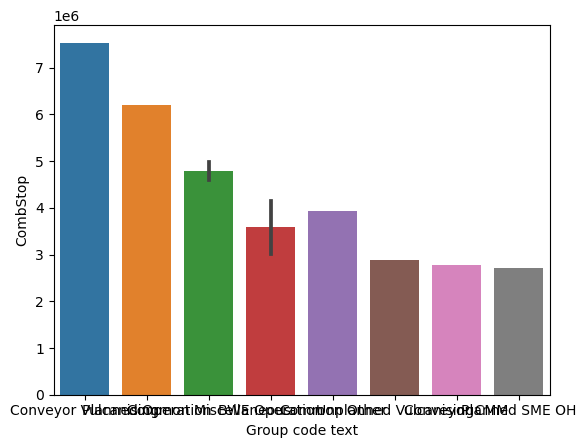

In [32]:
sns.barplot(x='Group code text',y="CombStop", data=df2)

In [14]:
secs = df2['CombStop'].tolist()
secs

[7532100,
 6208200,
 4976700,
 4605300,
 4154100,
 3938700,
 3018300,
 2883600,
 2783700,
 2707200]

In [15]:
combcode = df2['CombCode'].tolist()
combcode

['4409',
 '3002',
 '0721',
 '0799',
 '1012',
 '0901',
 '1001',
 '9404',
 '4501',
 '3301']

In [16]:

Groupcodetext = df2['Group code text'].tolist()
Groupcodetext



['Conveyor Vulcanising',
 'Planned Operation',
 'Common Miscellaneous',
 'Common Miscellaneous',
 'BWE Operation',
 'Common Other',
 'BWE Operation',
 'Unplanned Vulcanising',
 'Conveyor CMM',
 'Planned SME OH']

In [17]:
Causecodetext = df2['Cause code text'].tolist()
Causecodetext

['BTR Clamp fixing',
 'Daily maintenance',
 'Machine on Stand-By',
 'Others',
 'BWE Repostioning/movement',
 'OB Rear load',
 'BWE Track Area Preparation',
 'Conveyor unplanned vulcanising',
 'Line  roller changing/removal',
 'Over haul']

In [18]:
import plotly.express as px

In [19]:

bar_chart = px.bar(
                   x='Cause code text',
                   y='CombStop',
                   color_discrete_sequence = ['#F63366'],
                   template= 'plotly_white')
st.plotly_chart(bar_chart)

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'x' is of type str or int.

In [ ]:
import streamlit as st

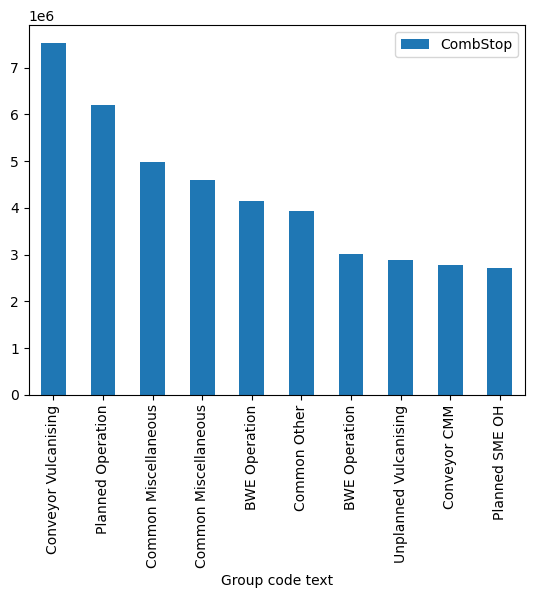

In [20]:
df2.plot(x='Group code text', y=['CombStop'], kind="bar")
mp.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

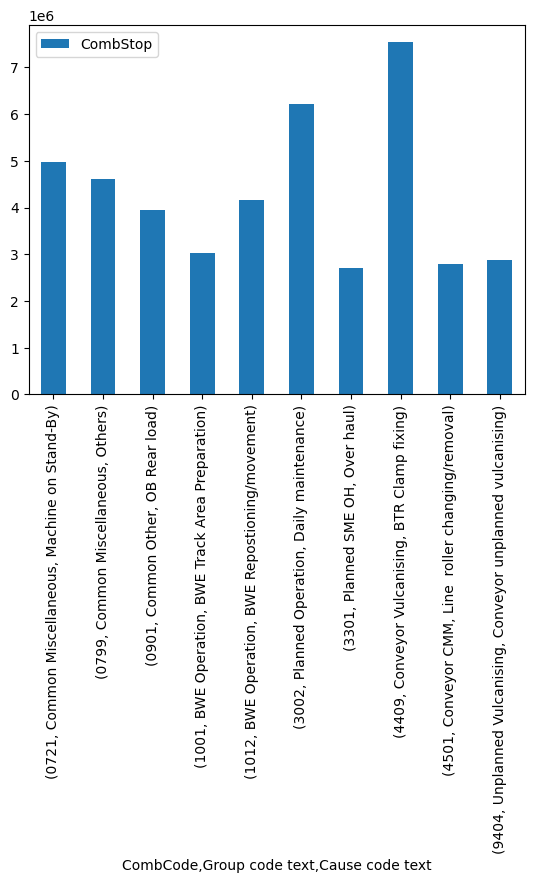

In [26]:
pivot = df2.groupby(['CombCode','Group code text','Cause code text']).mean()
pivot.plot(kind='bar')
plt.show()

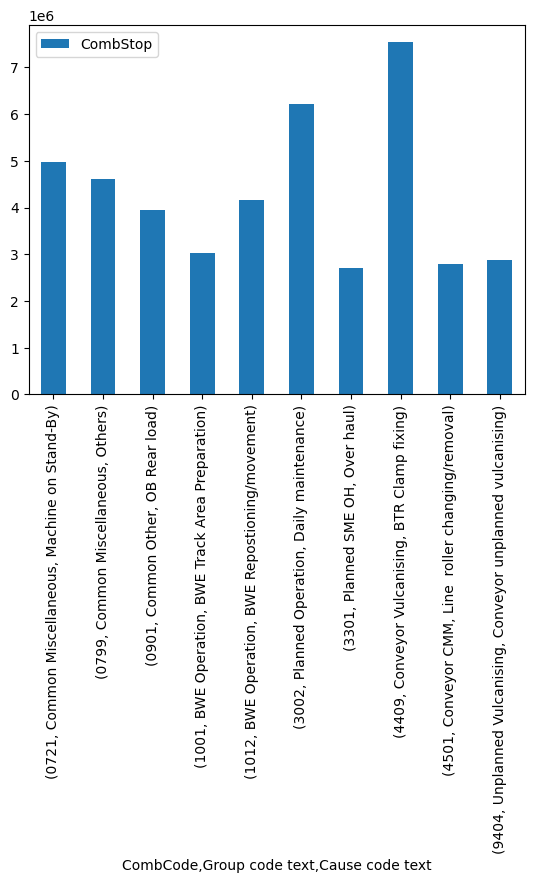

In [28]:
pivot = df2.groupby(['CombCode','Group code text','Cause code text']).mean()
pivot.plot(kind='bar')
plt.show()

In [23]:
import seaborn as sns

In [24]:
df3 = df2.groupby(['Group code text'])['CombStop'].sum().reset_index(name ='CombStop')
df3


,Group code text,CombStop
0,BWE Operation,7172400
1,Common Miscellaneous,9582000
2,Common Other,3938700
3,Conveyor CMM,2783700
4,Conveyor Vulcanising,7532100
5,Planned Operation,6208200
6,Planned SME OH,2707200
7,Unplanned Vulcanising,2883600


In [25]:
df3.sort_values(by="CombStop",ascending=False)

,Group code text,CombStop
1,Common Miscellaneous,9582000
4,Conveyor Vulcanising,7532100
0,BWE Operation,7172400
5,Planned Operation,6208200
2,Common Other,3938700
7,Unplanned Vulcanising,2883600
3,Conveyor CMM,2783700
6,Planned SME OH,2707200
